In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering

In [2]:
crime = pd.read_csv('C://Users//Lenovo//Downloads//Assignment//Clustering//crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
data = norm(crime.iloc[:,1:])
data

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [5]:
data.shape

(50, 4)

In [6]:
data.dropna()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [7]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(data)
Clusters = pd.DataFrame(y_hc,columns = ['Clusters'])

In [8]:
final = pd.concat([crime,Clusters],axis=1)
final

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [9]:
final.groupby('Clusters').mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [10]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc1 = hc1.fit_predict(data)
Clusters1 = pd.DataFrame(y_hc1,columns = ['Clusters'])
final1 = pd.concat([crime,Clusters1],axis=1)
final1.groupby('Clusters').mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,7.583333,165.416667,65.604167,20.525
1,10.000000,263.000000,48.000000,44.500
2,15.400000,335.000000,80.000000,31.900


In [11]:
#Single Linkage with 3 clusters gives the best answer

Airlines

In [12]:
air = pd.read_excel("C://Users//Lenovo//Downloads//Assignment//Clustering//EastWestAirlines.xlsx",sheet_name='data')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
air =norm(air.iloc[:,1:])

In [14]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [15]:
air_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'single')
op_model = air_model.fit_predict(air)
Clust = pd.DataFrame(op_model,columns = ['Clust'])
Last = pd.concat([air,Clust],axis=1)
Last.groupby('Clust').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clust,,,,,,,,,,,
0,0.056903,0.021530,0.415709,0.00777,0.004561,0.109511,0.182967,0.027169,0.048406,0.557663,1.0
1,0.035081,0.007858,0.176330,0.00695,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,0.093917,0.044851,0.000000,0.00000,0.000000,0.272879,1.000000,1.000000,1.000000,0.165300,1.0


In [16]:
air_model1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'average')
op_model1 = air_model1.fit_predict(air)
Clust1 = pd.DataFrame(op_model1,columns = ['Clust'])
Last1 = pd.concat([air,Clust1],axis=1)
Last1.groupby('Clust').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clust,,,,,,,,,,,
0,0.042898,0.012912,0.264835,0.007261,0.003067,0.064836,0.134175,0.014259,0.024910,0.496466,0.369554
1,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.000000


In [17]:
air_model2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean',linkage = 'average')
op_model2 = air_model2.fit_predict(air)
Clust2 = pd.DataFrame(op_model2,columns = ['Clust'])
Last2 = pd.concat([air,Clust2],axis=1)
Last2.groupby('Clust').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clust,,,,,,,,,,,
0,0.056234,0.021535,0.41582,0.007791,0.004573,0.109274,0.181706,0.026059,0.046403,0.557974,1.0
1,0.035081,0.007858,0.17633,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0
2,1.000000,0.000000,0.00000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0
3,0.077426,0.031127,0.37500,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0


# K-means clustering

In [18]:
Kcrime = pd.read_csv('C://Users//Lenovo//Downloads//Assignment//Clustering//crime_data.csv')
Kcrime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Kcrime_df = scaler.fit_transform(Kcrime.iloc[:,1:])
scaled_Kcrime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

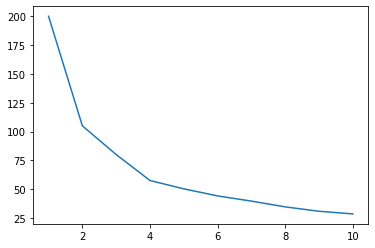

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(scaled_Kcrime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.show()

In [21]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Kcrime_df)

KMeans(n_clusters=4, random_state=42)

In [22]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [23]:
Kcrime['clusterid_new'] = clusters_new.labels_

In [24]:
Kcrime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [25]:
Kair = pd.read_excel("C://Users//Lenovo//Downloads//Assignment//Clustering//EastWestAirlines.xlsx",sheet_name='data')
Kair.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Kair_df = scaler.fit_transform(Kair.iloc[:,1:])
scaled_Kair_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

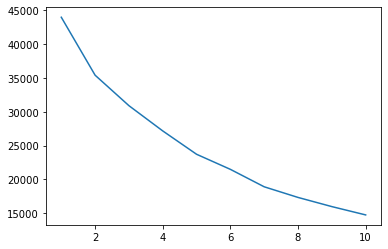

In [27]:
wcss1 = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters = i,random_state = 0)
    kmeans1.fit(scaled_Kair_df)
    wcss1.append(kmeans1.inertia_)
    
plt.plot(range(1,11),wcss1)
plt.show()

In [28]:
clusters_new_air = KMeans(4, random_state=42)
clusters_new_air.fit(scaled_Kair_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
Kair['clusterid_new'] = clusters_new_air.labels_

In [30]:
Kair.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2238.186083,44202.374902,96.865520,1.228694,1.019156,1.000391,4767.366302,6.957780,198.688428,0.619234,3701.567240,0.202111
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1602.838224,116671.953212,157.735131,3.716891,1.002379,1.001586,39498.719270,18.826328,342.704203,1.018239,4882.059477,0.652657
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [31]:
clusters_new_air = KMeans(3, random_state=42)
clusters_new_air.fit(scaled_Kair_df)

KMeans(n_clusters=3, random_state=42)

In [32]:
Kair['clusterid_new'] = clusters_new_air.labels_


In [33]:
Kair.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2230.691506,44605.587259,100.377606,1.243243,1.018919,1.000386,4899.749035,7.051737,198.801158,0.621236,3715.707722,0.206178
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1602.846463,117954.548232,151.036977,3.747588,1.002412,1.038585,40772.810289,19.047428,348.151125,1.031350,4879.751608,0.654341


# DBSCAN

In [34]:
Dcrime = pd.read_csv('C://Users//Lenovo//Downloads//Assignment//Clustering//crime_data.csv')
Dcrime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
Dcrime.drop(['Unnamed: 0'],axis=1,inplace=True)

In [36]:
Dcrime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [37]:
Darray = Dcrime.values

In [38]:
Darray

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [39]:
dstscaler = StandardScaler().fit(Darray)
X = dstscaler.transform(Darray)


In [40]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [41]:
#min samples = 2*dimension = 2*4=8
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1.5,min_samples = 8)
dbscan.fit(X)

DBSCAN(eps=1.5, min_samples=8)

In [42]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [43]:
cl = pd.DataFrame(dbscan.labels_,columns = ['Clusters'])
pd.concat([cl,Dcrime],axis=1)

,Clusters,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,-1,10.0,263,48,44.5
2,0,8.1,294,80,31.0
3,0,8.8,190,50,19.5
4,0,9.0,276,91,40.6
5,0,7.9,204,78,38.7
6,0,3.3,110,77,11.1
7,0,5.9,238,72,15.8
8,0,15.4,335,80,31.9
9,0,17.4,211,60,25.8


In [44]:
Dair = pd.read_excel("C://Users//Lenovo//Downloads//Assignment//Clustering//EastWestAirlines.xlsx",sheet_name='data')
Dair.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [45]:
array = Dair.values

In [46]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [47]:
stscaler = StandardScaler().fit(array)
Y = stscaler.transform(array)

In [48]:
Y

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [65]:
adbscan = DBSCAN(eps = 2,min_samples = 22)
adbscan.fit(Y)

DBSCAN(eps=2, min_samples=22)

In [66]:
import sys
np.set_printoptions(threshold=sys.maxsize)
adbscan.labels_

array([ 0,  0,  0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  0,  0,  0,  1,  1,
        1,  1,  1,  1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  1,  1,  0,  1,  1,  0,  1,  1, -1,  0,  1,  0,  1,  1,  0, -1,
        0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,
        1,  1, -1,  0, -1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        1,  1, -1,  0,  1,  1,  0,  1,  1, -1,  0,  0,  0,  0,  1,  1,  1,
        0,  1,  0,  1, -1,  1,  1,  1,  0,  1, -1,  1,  1,  0,  0, -1,  1,
        1,  0, -1,  1,  1,  0,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1, -1,  0,
        0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0, -1,
        0,  0,  0, -1, -1,  1, -1,  1,  0,  1,  0, -1,  1,  1,  1,  0,  1,
        0,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0, -1,
        1,  1,  0,  0,  0

In [67]:
cl1 = pd.DataFrame(adbscan.labels_,columns = ['Clusters'])


In [68]:
pd.concat([Dair,cl1],axis = 1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
